In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

class AntColonyOptimization:
    def __init__(self, start, end, obstacles, grid_size=(10, 10), num_ants=10, evaporation_rate=0.1, alpha=0.1, beta=15):
        self.start = start
        self.end = end
        self.obstacles = obstacles
        self.grid_size = grid_size
        self.num_ants = num_ants
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromones = np.ones(grid_size)
        self.best_path = None

    def _get_neighbors(self, position):
        pos_x, pos_y = position
        neighbors = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                new_x, new_y = pos_x + i, pos_y + j
                if (0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1] and
                        (new_x, new_y) != position and (new_x, new_y) not in self.obstacles):
                    neighbors.append((new_x, new_y))
        return neighbors

    def _select_next_position(self, position, visited):
        neighbors = self._get_neighbors(position)
        probabilities = []
        total = 0
        for neighbor in neighbors:
            if neighbor not in visited:
                pheromone = self.pheromones[neighbor[1], neighbor[0]]
                heuristic = 1 / (np.linalg.norm(np.array(neighbor) - np.array(self.end)) + 0.1)
                probabilities.append((neighbor, pheromone ** self.alpha * heuristic ** self.beta))
                total += pheromone ** self.alpha * heuristic ** self.beta
        if not probabilities:
            return None
        probabilities = [(pos, prob / total) for pos, prob in probabilities]
        selected = np.random.choice(len(probabilities), p=[prob for pos, prob in probabilities])
        return probabilities[selected][0]

    def _evaporate_pheromones(self):
        self.pheromones *= (1 - self.evaporation_rate)

    def _deposit_pheromones(self, path):
        for position in path:
            self.pheromones[position[1], position[0]] += 1

    def find_best_path(self, num_iterations):
        for _ in range(num_iterations):
            all_paths = []
            for _ in range(self.num_ants):
                current_position = self.start
                path = [current_position]
    
                while current_position != self.end:
                    next_position = self._select_next_position(current_position, path)
    
                    if next_position is None:
                        break  # Hormiga atrapada, termina el recorrido
    
                    path.append(next_position)
                    current_position = next_position
    
                all_paths.append(path)  # Agregar el camino (válido o no)
    
            # ✅ Filtrar solo caminos que realmente llegan al destino
            valid_paths = [p for p in all_paths if p and p[-1] == self.end]
    
            if not valid_paths:
                # ⚠️ Si ninguna hormiga llegó, saltar evaporación y depósito
                continue
    
            # ✅ Escoger el más corto ENTRE los caminos válidos
            best_path = min(valid_paths, key=len)
    
            # 💧 Evaporar feromonas en todo el grafo
            self._evaporate_pheromones()
    
            # 🐜 Reforzar el mejor camino encontrado en esta iteración
            self._deposit_pheromones(best_path)
    
            # ✅ Guardar globalmente el mejor camino encontrado hasta ahora
            if self.best_path is None or len(best_path) <= len(self.best_path):
                self.best_path = best_path


    def plot(self):
        cmap = LinearSegmentedColormap.from_list('pheromone', ['white', 'green', 'red'])
        plt.figure(figsize=(8, 8))
        plt.imshow(self.pheromones, cmap=cmap, vmin=np.min(self.pheromones), vmax=np.max(self.pheromones))
        plt.colorbar(label='Pheromone intensity')
        plt.scatter(self.start[0], self.start[1], color='orange', label='Start', s=100)
        plt.scatter(self.end[0], self.end[1], color='magenta', label='End', s=100)
        for obstacle in self.obstacles:
            plt.scatter(obstacle[0], obstacle[1], color='gray', s=900, marker='s')
        if self.best_path:
            path_x, path_y = zip(*self.best_path)
            plt.plot(path_x, path_y, color='blue', label='Best Path', linewidth=3)
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.title('Ant Colony Optimization')
        plt.legend()
        plt.grid(True)
        plt.show()
def study_case_1():
    print("Start of Ant Colony Optimization - First Study Case")
    start = (0, 0)
    end = (4, 7)
    obstacles = [(1, 2), (2, 2), (3, 2)]
    aco = AntColonyOptimization(start, end, obstacles)
    aco.find_best_path(100)
    aco.plot()
    print("End of Ant Colony Optimization")
    print("Best path: ", aco.best_path)

def study_case_2():
    print("Start of Ant Colony Optimization - Second Study Case")
    start = (0, 0)
    end = (4, 7)
    obstacles = [(0, 2), (1, 2), (2, 2), (3, 2)]
    aco = AntColonyOptimization(start, end, obstacles)
    aco.find_best_path(100)
    aco.plot()
    print("End of Ant Colony Optimization")
    print("Best path: ", aco.best_path)

Start of Ant Colony Optimization - First Study Case


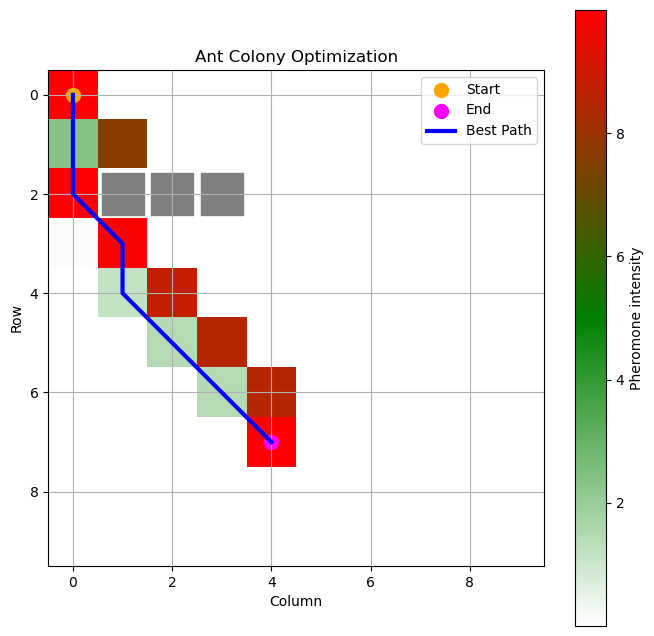

End of Ant Colony Optimization
Best path:  [(0, 0), (0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (3, 6), (4, 7)]


In [17]:
if __name__ == '__main__':
    study_case_1()

In [ ]:
El código implementa el algoritmo ACO (Ant Colony Optimization) para encontrar una ruta desde un punto de inicio a un punto final en un grid 2D, 
evitando obstáculos.

Parámetros definidos:
Inicio: (0, 0)
Fin: (4, 7)
Obstáculos: tres posiciones bloqueadas en una fila vertical:
→ (1,2), (2,2), (3,2)
Iteraciones: 100
Tamaño de la grilla: por defecto (10,10)
Número de hormigas: 10
Tasa de evaporación de feromonas: 0.1
α (influencia de la feromona): 0.1 → poca importancia
β (influencia de la heurística): 15 → muy importante

Inicialización:
Se prepara una grilla de 10x10 con todas las celdas disponibles, excepto los obstáculos.
Se asigna un nivel de feromona inicial de 1 en todas las celdas.

Búsqueda iterativa (100 ciclos):
En cada iteración:
10 hormigas son lanzadas desde el inicio.
Cada hormiga construye un camino hasta el nodo final o se detiene si no puede avanzar.
Los caminos encontrados se almacenan.
Se selecciona el mejor camino (el más corto) entre todos.
Se aplica evaporación de feromonas en toda la grilla.
Se deposita feromona adicional en el mejor camino.
Se actualiza self.best_path si este nuevo camino es mejor o igual al anterior.

Visualización:
Se muestra la grilla con:
Los obstáculos (gris)
El punto de inicio (naranja)
El punto final (magenta)
La ruta encontrada (línea azul)
Un mapa de calor de las feromonas (de blanco a verde hasta rojo)

Comportamiento Inteligente del Sistema:
La heurística favorece celdas más cercanas al objetivo (con 1/distancia).
Las hormigas tienden a explorar nuevas rutas, pero aprenden colectivamente mediante el depósito de feromonas.
Con el tiempo, el sistema converge hacia el mejor camino, aunque no garantiza que sea el óptimo global.


Start of Ant Colony Optimization - Second Study Case


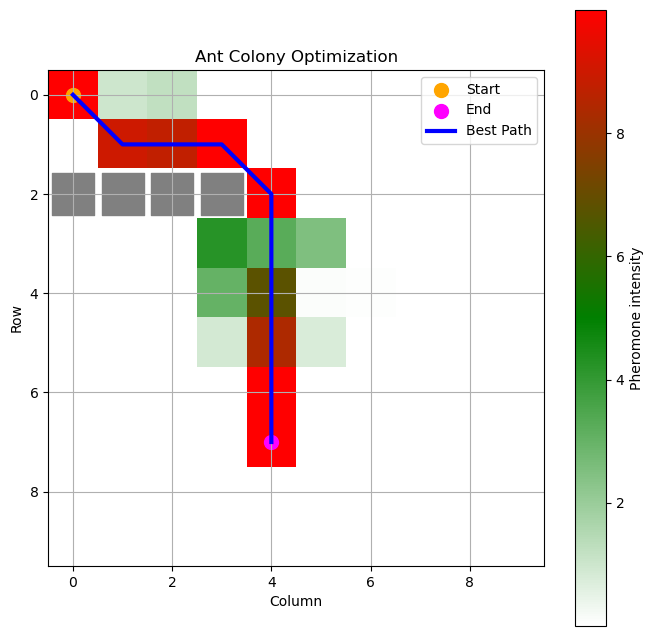

End of Ant Colony Optimization
Best path:  [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


In [19]:
if __name__ == '__main__':
    study_case_2()

In [ ]:
1.Problema:
El algoritmo ACO no encontraba un camino hasta el final (self.end) en el caso de estudio 2.
El gráfico mostraba que las hormigas daban vueltas sin llegar.

2. Código original
En el método find_best_path, se elegía el camino más corto de todos, sin importar si llegaba o no al destino.

3. Solución
Se añadio una validación para quedarse solo con caminos que llegaban a self.end.
Si no hay ningún camino válido, la iteración se ignora (no se reforzaba nada).
Se selecciona el camino más corto entre los válidos.
Se reforza con feromonas solo esos caminos válidos, y se evitaba aprender caminos incompletos.

4. Resultado
Ahora el algoritmo encuentra correctamente caminos que llegan al destino.
Ya no se refuerzan trayectorias inútiles.
El mejor camino se actualiza solo si es igual o mejor que el anterior.

Conclusión:
El problema era lógico, no de parámetros.
La solución correcta fue aplicar una validación del destino antes de elegir el mejor camino.
No se hizo ningún cambio en los parámetros. Esto no fue necesario para resolver el problema, 
aunque sí podría usarse para mejorar la eficiencia o calidad del resultado más adelante.


